## GNNShap Explanation Visualization

**__Please make sure to run this notebook from the project's root directory.__**


In [1]:
import sys
sys.path.append('/home/adhoc/GXG/GNNShap/GNNShap')


from dataset.configs import get_config

import time

import matplotlib

matplotlib.rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
import torch

from dataset.utils import get_model_data_config
from gnnshap.explainer import GNNShapExplainer



/opt/anaconda3/envs/GXG_GNNShap/lib/python3.10/site-packages/torch/utils/cpp_extension.py:1965: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


In [2]:
dataset_name = 'Cora'
num_samples = 25000
batch_size = 1024
sampler = 'GNNShapSampler'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# get mode, data and config
model, data, config = get_model_data_config(dataset_name, load_pretrained=True, device=device)

./


/opt/anaconda3/envs/GXG_GNNShap/lib/python3.10/site-packages/torch_geometric/data/dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and torch.lo

### Node 37 explanation

In [18]:
explain_node_idx = 60

gshap = GNNShapExplainer(model, data, nhops=config['num_hops'], verbose=0, device=device,
                    progress_hide=True)
start_time = time.time()

explanation = gshap.explain(explain_node_idx, nsamples=num_samples,
                                                        sampler_name=sampler,
                                                        batch_size=batch_size)

### Shapley values

In [19]:
explanation.shap_values

array([ 3.10221147e-02, -4.06768844e-02,  1.53803183e-02,  7.42841093e-03,
       -6.12206757e-03, -2.85526039e-03,  1.65630579e-02,  1.09693683e-04,
        2.30174497e-04,  1.14918174e-02,  2.48860638e-03,  1.82656175e-03,
       -2.56272545e-03, -7.37844547e-03,  8.23026523e-03, -1.41852930e-01,
       -1.13336630e-01, -5.00597581e-02,  6.26479974e-03,  8.39434657e-03,
       -2.60449131e-03,  7.57703884e-03, -1.09902965e-02,  4.06645180e-04,
        2.34460421e-02, -1.98507737e-02], dtype=float32)

### Fidelity score for an explanation

In [20]:
explanation.fidelity_prob(model, data, sparsity=0.3, score_type='neg')

(0.04210484027862549, 0.2692307692307692)

### Explanation times

In [21]:

explanation.time_comp_graph, explanation.time_sampling, explanation.time_predictions, explanation.time_solver

(0.0009064674377441406,
 0.0008285045623779297,
 0.05034995079040527,
 0.010319232940673828)

### Explanation Graph

Blue edges reduce the prediction score while red edges increase the score.

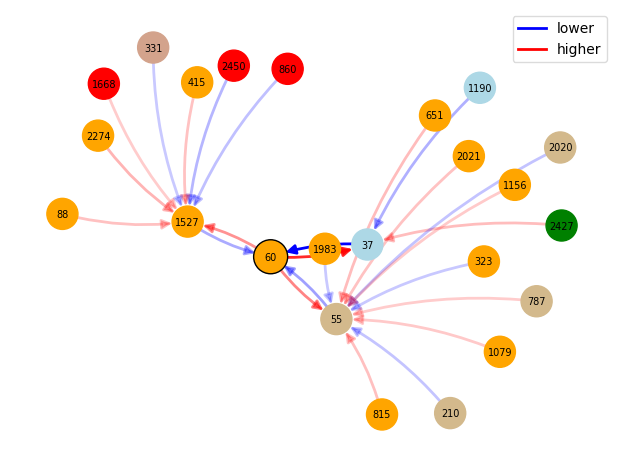

In [22]:
explanation.plot_graph(show_scores=False, show=False)
plt.tight_layout()
plt.box(False)
#plt.savefig('ExplanationGraph.pdf', dpi=300, bbox_inches='tight')

### Bar plot

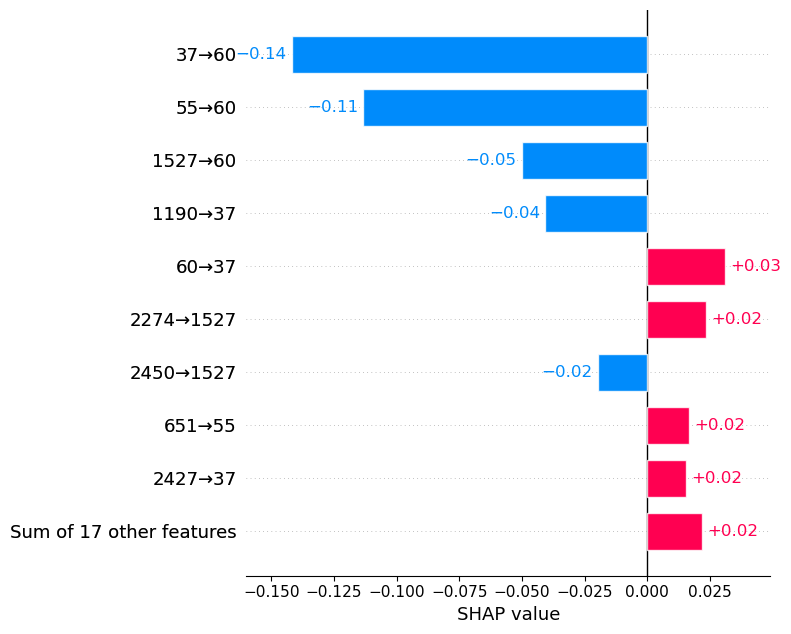

In [23]:
explanation.plot_bar(show=False)
plt.tight_layout()
#plt.savefig("BarVisualization.pdf", dpi=300, bbox_inches='tight')

### Force plot

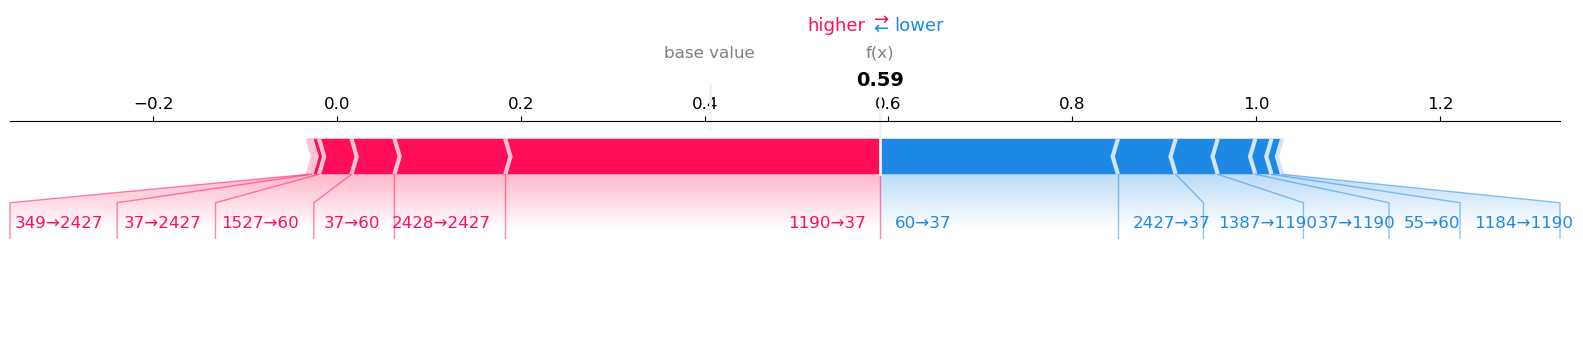

In [17]:
explanation.plot_force(show_values=False)